<h3>A anaylis on <b>IPL</b> mathes from 2008 to 2017 using pandas</h3>

<p>You can get the data from <a href='https://www.kaggle.com/datasets/manasgarg/ipl?select=matches.csv'>Indian Premier League (Cricket) Kaggle</a></p>
<p>To find analysis on warner bros movie dataset you can see this notebook<a href='https://github.com/shoabahamed/warner_bros_films_database-2010to2019/blob/main/analyzing_waner_bros_movie_dataset.ipynb'> analyzing_waner_bros_movie_dataset.ipynb</a></p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore') #to supress warnings

In [3]:
matches = pd.read_csv('./ipl/matches.csv')

In [4]:
matches.sample(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
273,274,2011,Delhi,2011-05-02,Delhi Daredevils,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,0,Kochi Tuskers Kerala,0,7,P Parameswaran,Feroz Shah Kotla,Asad Rauf,SL Shastri,NaN
483,484,2014,Mumbai,2014-05-06,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,19,0,RG Sharma,Wankhede Stadium,S Ravi,K Srinath,NaN


<p>First lets clean and feature engineer the datas a bit</p>

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

<p>Since most of records on third umpire is missing we will remove this column</p>

In [6]:
matches.drop(columns=['umpire3'], inplace=True)

<p>Before deciding with what to do with the other missing values lets see where the datas are missing and how do they look</p>

In [7]:
matches[matches['umpire1'].isnull()][['umpire1', 'umpire2']]

,umpire1,umpire2
4,NaN,NaN


In [8]:
matches[matches['winner'].isnull()]['winner']

300    NaN
545    NaN
570    NaN
Name: winner, dtype: object

In [9]:
matches[matches['city'].isnull()]['city']

461    NaN
462    NaN
466    NaN
468    NaN
469    NaN
474    NaN
476    NaN
Name: city, dtype: object

<p>For now lets ignore the missing values</p>

<p>In this analysis we need to find some things---
    <ol>
        <li>To see which team won the most mathces and what was their percentage of winning from 2008 and 2017 and and also what was the percentage in each year(hard)</li>
        <li>Find out who had won most of player of the matches and in which venu most matches held(easy)</li>
        <li>How much impact does chosing to field first effect a team in certain stadiums(tricky)</li>
        <li>Which umpires attended most mathces together</li>
     </ol>
     
   <br>
   A bonus question---
   &nbspCan you tell which team won each year and how many matches were held in each month from 2008 to 2017
</p>

<p>For the first problems first part We can see the see which teams won the most matches if we group by the winner team column and count them. Here we will be ignoring the null values</p>

In [10]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

<p>We can see that Rising Pune Supergiant and Rising Pune Supergiant mentioned twice although they are actually the same team</p>

In [11]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

<p>It is the same for other places to so what can we do is that we can replace Rising Pune Supergiant as Rising Pune Supergiants</p>

In [12]:
def replace_name(name):
    if name == 'Rising Pune Supergiant':
        return 'Rising Pune Supergiants' #replacing name
    else:
        return name
    
matches = matches.applymap(replace_name)
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan], dtype=object)

In [13]:
teams_win = matches.groupby('winner')['winner'].count().sort_values(ascending=False)
teams_win   # matches won by each team since 2008                                                                         

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

<P>We can say that Mumbai Indians won 92 matches which is the highest</P>

In [14]:
# to get the normalize or percentage values
(teams_win / teams_win.sum()) * 100

winner
Mumbai Indians                 14.533965
Chennai Super Kings            12.480253
Kolkata Knight Riders          12.164297
Royal Challengers Bangalore    11.532385
Kings XI Punjab                11.058452
Rajasthan Royals                9.952607
Delhi Daredevils                9.794629
Sunrisers Hyderabad             6.635071
Deccan Chargers                 4.581359
Rising Pune Supergiants         2.369668
Gujarat Lions                   2.053712
Pune Warriors                   1.895735
Kochi Tuskers Kerala            0.947867
Name: winner, dtype: float64

<h4>You may think that we have already gotten our answer but this is not the case.<br>
The series above shows the percentage of teams winning rate in all of 633 matches but this is not what we want what we want is get their winning percentage relative to how many matches. As some teams only played during one session. So what we need to do is figure how many mathces each team played since 2008 and then find their winning percentage</h4> 

<p>Since there is only team 1 and team 2 and they unique in respective records we can first count each teams playing as team1 and team2 and add them together</p>

In [15]:
matches_team_1 = matches.dropna(subset=['winner']).groupby('team1')['team1'].count()
matches_team_1  # amount of matches played as team 1

team1
Chennai Super Kings            77
Deccan Chargers                43
Delhi Daredevils               61
Gujarat Lions                  14
Kings XI Punjab                77
Kochi Tuskers Kerala            7
Kolkata Knight Riders          68
Mumbai Indians                 82
Pune Warriors                  20
Rajasthan Royals               54
Rising Pune Supergiants        15
Royal Challengers Bangalore    69
Sunrisers Hyderabad            46
Name: team1, dtype: int64

In [16]:
matches_team_2 = matches.dropna(subset=['winner']).groupby('team2')['team2'].count()
matches_team_2     # amount of matches played as team 2

team2
Chennai Super Kings            54
Deccan Chargers                32
Delhi Daredevils               84
Gujarat Lions                  16
Kings XI Punjab                71
Kochi Tuskers Kerala            7
Kolkata Knight Riders          80
Mumbai Indians                 75
Pune Warriors                  25
Rajasthan Royals               63
Rising Pune Supergiants        15
Royal Challengers Bangalore    81
Sunrisers Hyderabad            30
Name: team2, dtype: int64

In [17]:
matches_played = (matches_team_1 + matches_team_2).sort_index()
matches_played.sort_values(ascending=False)  # the number of matches played by each team

team1
Mumbai Indians                 157
Royal Challengers Bangalore    150
Kings XI Punjab                148
Kolkata Knight Riders          148
Delhi Daredevils               145
Chennai Super Kings            131
Rajasthan Royals               117
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   45
Gujarat Lions                   30
Rising Pune Supergiants         30
Kochi Tuskers Kerala            14
dtype: int64

In [18]:
teams_win_percentage = ((teams_win.sort_index() / matches_played).sort_values(ascending=False)) * 100
teams_win_percentage  # winning percentage of each team

winner
Chennai Super Kings            60.305344
Mumbai Indians                 58.598726
Sunrisers Hyderabad            55.263158
Rajasthan Royals               53.846154
Kolkata Knight Riders          52.027027
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    48.666667
Kings XI Punjab                47.297297
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.758621
Deccan Chargers                38.666667
Pune Warriors                  26.666667
dtype: float64

In [19]:
win_df = pd.concat([matches_played, teams_win, teams_win_percentage], axis=1)

win_df.columns = ['Match played', "Won matches", "Winning percentage"] # changing columns names

win_df['Winning percentage'] = win_df['Winning percentage'].apply(lambda x: round(x, 2)) #rounding 
                                                                                         # values
win_df.sort_values('Winning percentage', inplace=True) #sorting

In [20]:
win_df

,Match played,Won matches,Winning percentage
Pune Warriors,45,12,26.67
Deccan Chargers,75,29,38.67
Delhi Daredevils,145,62,42.76
Kochi Tuskers Kerala,14,6,42.86
Gujarat Lions,30,13,43.33
Kings XI Punjab,148,70,47.30
Royal Challengers Bangalore,150,73,48.67
Rising Pune Supergiants,30,15,50.00
Kolkata Knight Riders,148,77,52.03
Rajasthan Royals,117,63,53.85


<p>Lets visualize the winning percentage using matplotlib</p>

In [21]:
y_list = win_df.index
width = win_df['Winning percentage']
labels = win_df['Winning percentage']

def add_label_value(x_list, y_list, labels):        # adding labels in bars
    labels = [str(label)+'%' for label in labels]
    for x_value, y_value, label in zip(x_list, y_list, labels):
        plt.text(x_value, y_value, label, style='italic', weight='bold')

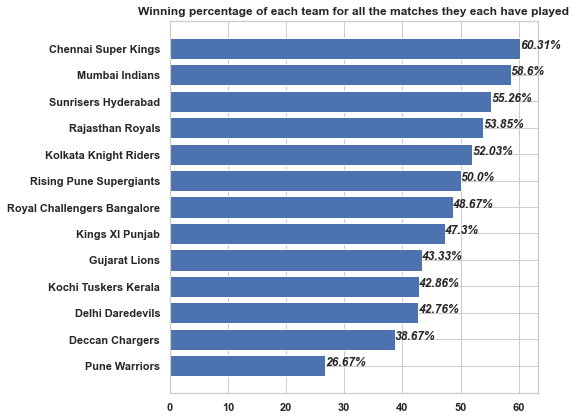

In [23]:
plt.figure(figsize=(8, 6))
sns.set_theme(style='whitegrid')

plt.barh(y_list, width)
add_label_value(width, y_list, labels)

plt.title('Winning percentage of each team for all the matches they each have played', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.tight_layout()
plt.show()

<h4>We can see that of all the mathces that each team played Chennai Super Kings is the team with highest percentage with Mumbai Indians following closesly behind</h4>

<p>For the second part of the first problem we need to findout each teams winning percentage in each year</p>

<p>To do this we can first groupby season column then groupby winner column then count the number of win each team has won during that season</p>

In [24]:
season_df = matches.groupby(['season', 'winner']) #grouping by season then winning team
season_df.get_group((2008, 'Rajasthan Royals')).tail(3) 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen


<p>Now we need to know how many matches each team has won in each season</p>

In [25]:
season_matches_win = season_df['winner'].count()
season_matches_win.head(9)

season  winner                     
2008    Chennai Super Kings             9
        Deccan Chargers                 2
        Delhi Daredevils                7
        Kings XI Punjab                10
        Kolkata Knight Riders           6
        Mumbai Indians                  7
        Rajasthan Royals               13
        Royal Challengers Bangalore     4
2009    Chennai Super Kings             8
Name: winner, dtype: int64

<h4>Now lets figure out how many matches each team has played in each season. We can achicve this by grouping by season first then grouping by team1 and team2 then add them together</h4>

In [26]:
season_matches_team1 = matches.groupby(['season', 'team1'])['team1'].count()
season_matches_team1.head(9)

season  team1                      
2008    Chennai Super Kings             9
        Deccan Chargers                 8
        Delhi Daredevils                6
        Kings XI Punjab                 7
        Kolkata Knight Riders           9
        Mumbai Indians                  6
        Rajasthan Royals                6
        Royal Challengers Bangalore     7
2009    Chennai Super Kings            10
Name: team1, dtype: int64

In [27]:
season_matches_team2 = matches.groupby(['season', 'team2'])['team2'].count()
season_matches_team2.head(9)

season  team2                      
2008    Chennai Super Kings             7
        Deccan Chargers                 6
        Delhi Daredevils                8
        Kings XI Punjab                 8
        Kolkata Knight Riders           4
        Mumbai Indians                  8
        Rajasthan Royals               10
        Royal Challengers Bangalore     7
2009    Chennai Super Kings             4
Name: team2, dtype: int64

<p>Now we can just add teams where in each season they have played as team1 and team2</p>

In [28]:
season_matches_played = pd.concat([season_matches_team1, season_matches_team2], axis=1)
season_matches_played.head()

team1  team2
season                                    
2008   Chennai Super Kings        9      7
       Deccan Chargers            8      6
       Delhi Daredevils           6      8
       Kings XI Punjab            7      8
       Kolkata Knight Riders      9      4

In [29]:
season_matches_played['matches_played'] = season_matches_played['team1'] + season_matches_played['team2']

In [30]:
season_matches_played.sample(3)

,,team1,team2,matches_played
season,,,,
2014,Kings XI Punjab,10,7,17
2008,Mumbai Indians,6,8,14
2015,Delhi Daredevils,7,7,14


<p>We can just drop the team1 and team2 column since we do not need them</p>

In [31]:
season_matches_played.drop(columns=['team1', 'team2'], inplace=True)

In [32]:
season_matches_played.sample(3)

,,matches_played
season,,
2017,Delhi Daredevils,14
2014,Delhi Daredevils,14
2017,Kings XI Punjab,14


In [33]:
winning_vs_matches_percent = pd.concat([season_matches_win, season_matches_played], axis=1)
winning_vs_matches_percent.columns = ['matches_won', 'matches_played']

# normalize the data
winning_vs_matches_percent['winning_percentage'] = (winning_vs_matches_percent['matches_won']/winning_vs_matches_percent['matches_played'])*100
winning_vs_matches_percent['winning_percentage']= winning_vs_matches_percent['winning_percentage'].apply(lambda x: round(x, 2))

winning_vs_matches_percent.head(9)

matches_won  matches_played  \
season                                                            
2008   Chennai Super Kings                    9              16   
       Deccan Chargers                        2              14   
       Delhi Daredevils                       7              14   
       Kings XI Punjab                       10              15   
       Kolkata Knight Riders                  6              13   
       Mumbai Indians                         7              14   
       Rajasthan Royals                      13              16   
       Royal Challengers Bangalore            4              14   
2009   Chennai Super Kings                    8              14   

                                    winning_percentage  
season                                                  
2008   Chennai Super Kings                       56.25  
       Deccan Chargers                           14.29  
       Delhi Daredevils                          50.00  
       Kings XI Punjab                           66.67  
       Kolkata Knight Riders                     46.15  
       Mumbai Indians                            50.00  
       Rajasthan Royals                          81.25  
       Royal Challengers Bangalore               28.57  
2009   Chennai Super Kings                       57.14

<p>Now that we have all the datas we plot the values for better visualization</p>

In [34]:
seasons = [season for season, teams in winning_vs_matches_percent.index]
print(seasons)

[2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017]


<p>we will be converting index to set so that they are not duplicates values in year</p>

In [35]:
seasons = set(seasons)
print(seasons)

{2016, 2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


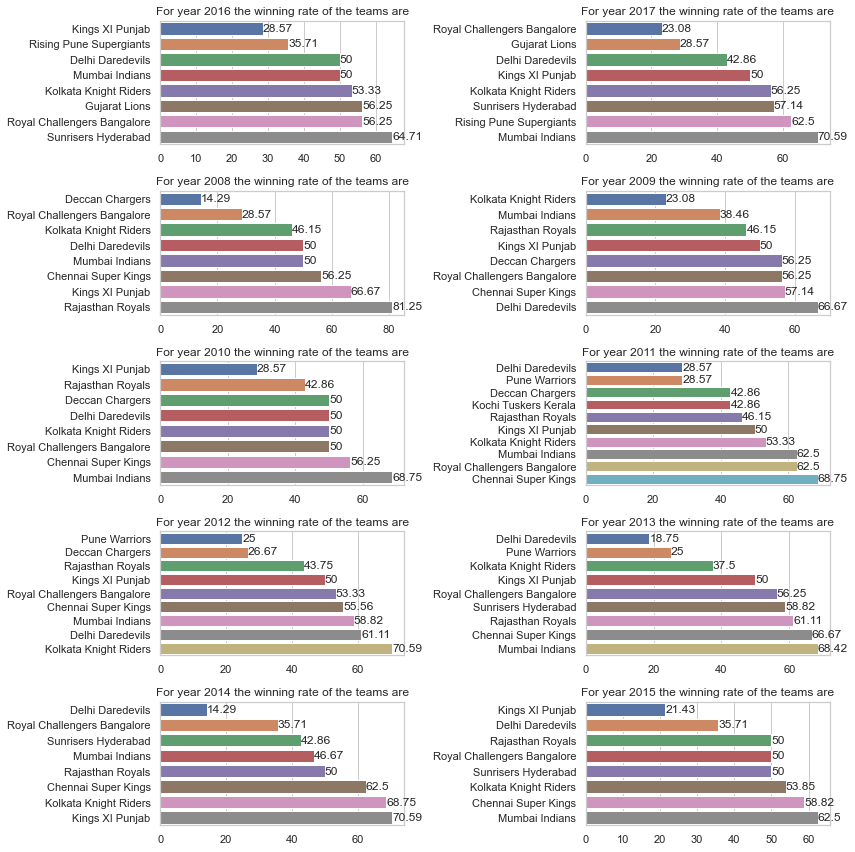

In [36]:
plt.figure(figsize=(12, 12))

for index, year in enumerate(seasons):
    season = winning_vs_matches_percent.loc[year].sort_values('winning_percentage')
    teams = season.index     #yaxis
    winning_rate = season['winning_percentage'].values #xaxis
    
#     now lets plot winnning rate in each season
    plt.subplot(5, 2, index+1)
    ax = sns.barplot(y=teams, x=winning_rate, orient='h')
        
    for val in ax.containers: #adding lables in bars
        ax.bar_label(val)
    
    plt.title(f'For year {year} the winning rate of the teams are')
    
plt.tight_layout()
plt.show()

<p>The second problem is very easy to solve we just need to count frequency for find the most succesful player and the most used vanues</p>

In [37]:
venue_count = matches['venue'].value_counts()
venue_count.head(5)

M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

In [38]:
norm_venue_count = (matches['venue'].value_counts(normalize=True)*100)
norm_venue_count.head()

M Chinnaswamy Stadium                        10.377358
Eden Gardens                                  9.591195
Feroz Shah Kotla                              9.433962
Wankhede Stadium                              8.962264
Rajiv Gandhi International Stadium, Uppal     7.704403
Name: venue, dtype: float64

In [39]:
best_player = matches['player_of_match'].value_counts()
best_player.head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

<h4>You can see that <b>CH GAYLE</b>Won the player of the matches the highest time and the most matches were played in <b>M Chinnaswamy Stadium</b> which is 10% of the matches played</h4>

<p>For the third problem we need to figure out if chosing to filed has any effect on winning the match in a particular venue(a tricky question but not that difficult)</p>

<p>To solve this problem first we need to many matches were played in each venue which we have already done in the 2nd question.we dropping rows which has null values in winner as counting them would be pointless as would not able to tell if chossing to filed has any impact on winning in a certain venue</p>

In [40]:
venue_count = matches.dropna(subset='winner')['venue'].value_counts()

In [41]:
venue_count.head()

M Chinnaswamy Stadium                        64
Eden Gardens                                 61
Feroz Shah Kotla                             59
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

In [42]:
print(f'There are {len(venue_count.index)} venues where matches were played')

There are 35 venues where matches were played


<P>Next we will divide to dataset into small datset which will only inlude those team who had won the toss then decided field first and in the end they won the match</P>

In [43]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [44]:
filt = (matches['toss_winner'] == matches['winner']) & (matches['toss_decision'] == 'field')
field_win = matches[filt]
field_win.sample(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
458,459,2014,Sharjah,2014-04-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,YS Chahal,Sharjah Cricket Stadium,Aleem Dar,S Ravi
616,617,2016,Bangalore,2016-05-11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KH Pandya,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin
360,361,2012,Jaipur,2012-05-10,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,BW Hilfenhaus,Sawai Mansingh Stadium,BNJ Oxenford,C Shamshuddin


<p>Now we just need to count the number of matches with this condition in each venue</p>

In [45]:
field_win = field_win['venue'].value_counts()
field_win.head()

M Chinnaswamy Stadium                        32
Eden Gardens                                 22
Feroz Shah Kotla                             19
Wankhede Stadium                             17
Rajiv Gandhi International Stadium, Uppal    12
Name: venue, dtype: int64

In [46]:
# making a dataframe by adding different series
venue_field = pd.concat([venue_count, field_win], axis=1)
venue_field.columns = ['matches_played', 'toss_field_win']
venue_field.fillna(0, inplace=True)

venue_field['win_perc'] = (venue_field['toss_field_win'] / venue_field['matches_played']) * 100
venue_field['win_perc'] = venue_field['win_perc'].apply(lambda x: round(x, 2))

venue_field.head()

,matches_played,toss_field_win,win_perc
M Chinnaswamy Stadium,64,32.0,50.00
Eden Gardens,61,22.0,36.07
Feroz Shah Kotla,59,19.0,32.20
Wankhede Stadium,57,17.0,29.82
"Rajiv Gandhi International Stadium, Uppal",49,12.0,24.49


In [47]:
venues = venue_field.sort_values('win_perc').index
perc = venue_field['win_perc'].sort_values()
labels = venue_field['win_perc'].sort_values()

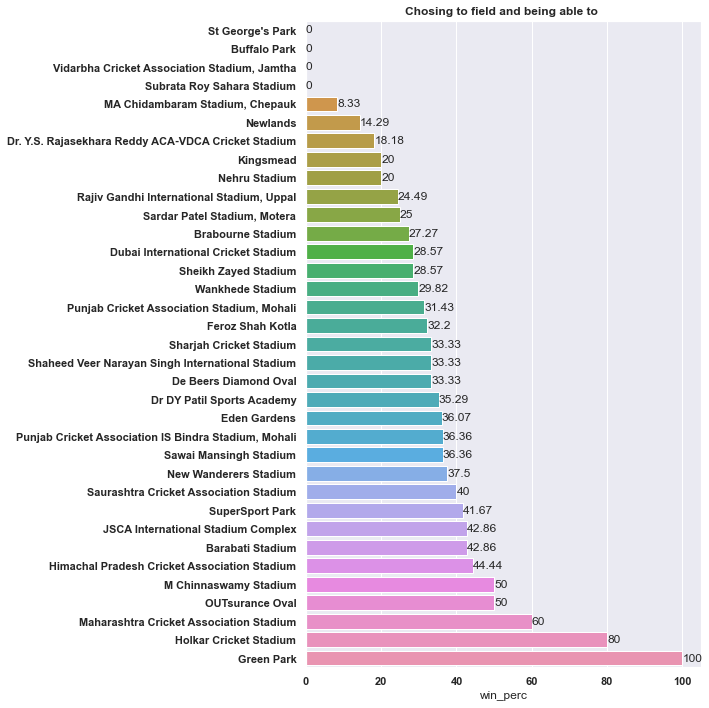

In [48]:
plt.figure(figsize=(10, 10))
sns.set_theme(style='darkgrid')

ax = sns.barplot(x=perc, y=venues)

plt.title('Chosing to field and being able to ', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
    
for val in ax.containers:
    ax.bar_label(val)
    
plt.tight_layout()
plt.show()

<p>In Green park the chances of winning when batting first is 100 percent which is very weird lets what this about</p>

In [49]:
venue_field.loc['Green Park']

matches_played      4.0
toss_field_win      4.0
win_perc          100.0
Name: Green Park, dtype: float64

In [50]:
venue_field.loc['Holkar Cricket Stadium']

matches_played     5.0
toss_field_win     4.0
win_perc          80.0
Name: Holkar Cricket Stadium, dtype: float64

<h4>You can see that although able to make a correlation between venues and winning a toss to filed first then win because the dataset is very small BUT</h4>
<h4>we can come to a definete answer that in IPL it can be seen that other than a few venues fielding first in any venue generally results in loosing the match</h4>

<p>To solve the last problem where we need to find the umpires who were in most matches together. To solve this problem we only need umpire columns</p>

In [51]:
umpires = matches[['umpire1', 'umpire2']]
umpires.head()

,umpire1,umpire2
0,AY Dandekar,NJ Llong
1,A Nand Kishore,S Ravi
2,Nitin Menon,CK Nandan
3,AK Chaudhary,C Shamshuddin
4,NaN,NaN


In [52]:
umpires.isnull().sum()

umpire1    1
umpire2    1
dtype: int64

In [53]:
umpires.dropna(inplace=True)

In [54]:
umpires = umpires.reset_index(drop=True) # rearraning the indices

<p>Now all we need to do is just one thing to count the occurence</p>

In [55]:
umpires['umpire1'].value_counts().to_frame().head()

,umpire1
HDPK Dharmasena,73
Asad Rauf,51
AK Chaudhary,43
Aleem Dar,38
BF Bowden,37


In [56]:
umpires['umpire1'].value_counts().loc[lambda x: x>20] 

HDPK Dharmasena    73
Asad Rauf          51
AK Chaudhary       43
Aleem Dar          38
BF Bowden          37
S Ravi             36
BR Doctrove        34
M Erasmus          32
Name: umpire1, dtype: int64

<p>Solution---------------------</p>

In [57]:
umpires.value_counts().head()

umpire1          umpire2      
S Ravi           RJ Tucker        12
Asad Rauf        S Asnani         11
HDPK Dharmasena  CK Nandan        10
S Ravi           C Shamshuddin     9
Asad Rauf        AK Chaudhary      8
dtype: int64

<p>It's pretty amazing as we were able solve a tricky question like this with just one command. But Eventhough we were able to get the answer we want there is a little problem</p>

But right the values are counted such that postion of the umpires matter meaning who is umpire1 and umpire2 is getting counted

In [58]:
data = {
    'column1': ['a', 'b', 'a'],
    'column2': ['b', 'a', 'b'],
}

In [59]:
df = pd.DataFrame(data)

df.value_counts()

column1  column2
a        b          2
b        a          1
dtype: int64

<p>As you can see that pandas value counts takes into consideration in which order the values are in. To solve this probelem we can do this</p>

In [60]:
umpires_tuples = [tuple(value) for value in umpires.values]
umpires_tuples[:5]

[('AY Dandekar', 'NJ Llong'),
 ('A Nand Kishore', 'S Ravi'),
 ('Nitin Menon', 'CK Nandan'),
 ('AK Chaudhary', 'C Shamshuddin'),
 ('A Deshmukh', 'NJ Llong')]

In [61]:
positions = []   #to find the positions of similar pair or records
pair_count = {}


for ump1, ump2 in umpires_tuples:  # we will taking each record and compare it all other records
    count = 0                      # to keep track of number of occurences
    
    if (ump1, ump2) in pair_count.keys() or (ump2, ump1) in pair_count.keys():
        continue                   # after counting one pair we will not count them agian
        
        
    for index in range(len(umpires_tuples)):        # checking if a==b and c==d
        if ump1 == umpires_tuples[index][0] and ump2 == umpires_tuples[index][1]:
            positions.append(index)
            count+=1
                
            
    for index in range(len(umpires_tuples)):  # checking if a==d and c == b
        if ump1 == umpires_tuples[index][1] and ump2 == umpires_tuples[index][0]:
            positions.append(index)
            count+=1
                     
    pair_count[(ump1, ump2)] = count         


In [62]:
len(umpires_tuples)

635

In [63]:
sum(pair_count.values())

635

<p>We were able to count all the values</p>

In [64]:
umpires.loc[positions].shape

(635, 2)

In [65]:
umpires.loc[positions].head()

,umpire1,umpire2
0,AY Dandekar,NJ Llong
12,AY Dandekar,NJ Llong
27,AY Dandekar,NJ Llong
1,A Nand Kishore,S Ravi
11,A Nand Kishore,S Ravi


In [66]:
pair_count = sorted(pair_count.items(), key=lambda x: x[1], reverse=True) # sorting the parit

In [67]:
pair_count[:5]

[(('S Ravi', 'RJ Tucker'), 12),
 (('Asad Rauf', 'S Asnani'), 11),
 (('HDPK Dharmasena', 'CK Nandan'), 10),
 (('S Ravi', 'C Shamshuddin'), 9),
 (('Aleem Dar', 'RB Tiffin'), 8)]

In [68]:
umpires.value_counts().head(5) # same as out previous answer 

umpire1          umpire2      
S Ravi           RJ Tucker        12
Asad Rauf        S Asnani         11
HDPK Dharmasena  CK Nandan        10
S Ravi           C Shamshuddin     9
Asad Rauf        AK Chaudhary      8
dtype: int64

<p>We can do the same thing in another way which is much easier. We can first sort each individual tuple then sort according to alphabets then count them</p>

In [69]:
a = ('abc', 'cdf')
b = ('cdf', 'abc')

print(sorted(a))
print(sorted(b))

['abc', 'cdf']
['abc', 'cdf']


<p>We first sort them like this then count each occurence</p>

In [70]:
sorted_ump_tuples = []

for tuples in umpires_tuples:
    sorted_tuple = sorted(tuples)
    sorted_ump_tuples.append(tuple(sorted_tuple))

<p>Now we can just count them using Counter clas from collections</p>

In [71]:
from collections import Counter

counter = Counter(sorted_ump_tuples)

counter.most_common(5)

[(('RJ Tucker', 'S Ravi'), 12),
 (('Asad Rauf', 'S Asnani'), 11),
 (('CK Nandan', 'HDPK Dharmasena'), 10),
 (('C Shamshuddin', 'S Ravi'), 9),
 (('Aleem Dar', 'RB Tiffin'), 8)]

In [72]:
pair_count[:5]

[(('S Ravi', 'RJ Tucker'), 12),
 (('Asad Rauf', 'S Asnani'), 11),
 (('HDPK Dharmasena', 'CK Nandan'), 10),
 (('S Ravi', 'C Shamshuddin'), 9),
 (('Aleem Dar', 'RB Tiffin'), 8)]

In [73]:
umpires.value_counts().head(10)

umpire1          umpire2      
S Ravi           RJ Tucker        12
Asad Rauf        S Asnani         11
HDPK Dharmasena  CK Nandan        10
S Ravi           C Shamshuddin     9
Asad Rauf        AK Chaudhary      8
BF Bowden        SK Tarapore       8
HDPK Dharmasena  SJA Taufel        8
S Ravi           SJA Taufel        8
M Erasmus        S Ravi            8
Aleem Dar        RB Tiffin         8
dtype: int64

<p>All our answer are same which means all of them are corrct and the umpires name was already entered correctly</p>

In [74]:
print(f'The number of pair of umpires in IPL is {len(pair_count)}')

The number of pair of umpires in IPL is 267


<h4>We can see that <b>S Ravi and Rj Tucker</b> umpired the highest matches together but value is not very high from which we can say that in IPL having both umpires having umpired many matches together in the past is very low. In 636 matches the were 237 combinations of umpires which means there were many umpires and none of them were very constant as pair which represents variabilty which makes sure the matches are as fair as possible</h4>

<p>For the bonus question where we need to find which team won each year we need to work with date. We only need the 
   season, date and winner column</p>

In [75]:
matches.sample(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
159,160,2009,Durban,2009-05-14,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper
377,378,2012,Pune,2012-05-22,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium,BR Doctrove,SJA Taufel
158,159,2009,Durban,2009-05-14,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Royal Challengers Bangalore,0,2,LRPL Taylor,Kingsmead,BR Doctrove,DJ Harper


In [76]:
season_matches = matches[['season', 'date', 'winner']]

In [77]:
season_matches.isnull().sum()

season    0
date      0
winner    3
dtype: int64

In [78]:
season_matches[season_matches['season'] == 2012].tail()

,season,date,winner
376,2012,2012-05-20,Mumbai Indians
377,2012,2012-05-22,Kolkata Knight Riders
378,2012,2012-05-23,Chennai Super Kings
379,2012,2012-05-25,Chennai Super Kings
380,2012,2012-05-27,Kolkata Knight Riders


In [79]:
season_matches[season_matches['winner'].isnull()]

,season,date,winner
300,2011,2011-05-21,NaN
545,2015,2015-04-29,NaN
570,2015,2015-05-17,NaN


<p>Since the datas are already sorted we only need to get last record of each season to know which team the tropy that year but we need to make sure that the winner column is not empty for last column too </p

In [80]:
win_each_season = season_matches.groupby('season').tail(1).sort_values('season')
win_each_season

,season,date,winner
116,2008,2008-06-01,Rajasthan Royals
173,2009,2009-05-24,Deccan Chargers
233,2010,2010-04-25,Chennai Super Kings
306,2011,2011-05-28,Chennai Super Kings
380,2012,2012-05-27,Kolkata Knight Riders
456,2013,2013-05-26,Mumbai Indians
516,2014,2014-06-01,Kolkata Knight Riders
575,2015,2015-05-24,Mumbai Indians
635,2016,2016-05-29,Sunrisers Hyderabad
58,2017,2017-05-21,Mumbai Indians


<h4>Fortunetly none of the winner columns of final matche are not missing. We can say the in 2008 Rajasthan Royals won the trophy and in 2017 Mumbai Indians was the winning team</h4>

<p>For the second part of the bonus question we need to work with datetime and we do not need the any other column other than date column</p>

In [81]:
season_matches = matches['date'].to_frame()
season_matches.head()

,date
0,2017-04-05
1,2017-04-06
2,2017-04-07
3,2017-04-08
4,2017-04-08


In [82]:
season_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    636 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


<p>First lets convert the date column to datetime object</p>

In [83]:
season_matches['date'] = pd.to_datetime(season_matches['date'])

In [84]:
season_matches.dtypes

date    datetime64[ns]
dtype: object

<p>First lets see if dates are unique</p>

In [85]:
len(season_matches['date'].unique())
# it seems there were multiple matches in one day

450

In [86]:
season_matches.head(3)

,date
0,2017-04-05
1,2017-04-06
2,2017-04-07


<p>Now there are multiple ways to count the matches that was held in each month. But the easiest one would be to just grab the months from the datetime object</p>

In [87]:
months = season_matches['date'].dt.month.to_frame()
months.head()

,date
0,4
1,4
2,4
3,4
4,4


<p>Now we can just count the frequencies</p>

In [88]:
months.value_counts()

date
5       308
4       297
3        29
6         2
dtype: int64

<h4>We can say the most of IPL matches from 2008 to 2017 was played 4th and 5 th month of a year which April and May</h4>

<p>If we want to know the frequency of how many matches were played in each month in each year we can also do it in a simillar way but lets do it in an aother way</p>

<p>Lets convert date to index so that we can manupulate dates more easily</p>

In [89]:
season_matches.set_index('date', inplace=True)

In [90]:
counts_df = season_matches.to_period('M')
counts_df.sample(5)

""
date
2010-03
2009-05
2012-04
2011-05
2013-05


<p>What to_period does is that it returns the datetime index in the specied formats way. Here we mentioned months(M) which means we will we will return the values till month by striping the days if we mentioned Year(Y) it would only return the datframe containing years as index</p>

In [91]:
counts_df.index.value_counts().sort_values(ascending=False).head(10)

2013-04    42
2008-05    40
2012-04    39
2014-05    39
2011-05    37
2009-05    37
2011-04    36
2017-04    36
2012-05    35
2013-05    34
Freq: M, Name: date, dtype: int64

<p>To find analysis on warner bros movie dataset you can see this notebook<a href='https://github.com/shoabahamed/warner_bros_films_database-2010to2019/blob/main/analyzing_waner_bros_movie_dataset.ipynb'> analyzing_waner_bros_movie_dataset.ipynb</a></p>